In [3]:
from main import train_model
import pandas as pd

In [4]:
RUN_TITLE = "This run includes only 3 GCNs - mRNA, DNA methylation, miRNA"
RUN_TITLE_SHORT = "brca_full"
# SEED can be "random" or integer, if integer, it will be used as the seed for random, numpy, torch, and cuda
SEED = 42

# pre-processed data
mrna = "R/TCGA BRCA/mrna_top1000_scaled.csv"
meth = "R/TCGA BRCA/meth_top1000_scaled.csv"
mirna = "R/TCGA BRCA/mirna_anova_scaled.csv"
meta_csv = "R/TCGA BRCA/PAM50_subtype.csv"
trte_partition_file = "R/TCGA BRCA/trte_partition.txt"

# change label from text to integer
label_dict = {'Normal':0, 'Basal':1, 'Her2':2, 'LumA':3, 'LumB':4}

# load preprocessed data from csv
#load_list - list of csv files to laod. The -2 position should be meta_csv and -1 position should be trte_partition_file
load_list = [mrna, meta_csv, trte_partition_file]
GCN_names = ["mRNA"]#,"methylation","miRNA"]

COMBINER = False

In [5]:
doSMOTE = True # Boolean

# MORONET training parameters
num_epoch = 850
test_interval = 50
lr = 5e-4
weight_decay = 1e-3
dropout = 0.25
adj_parameter = 8 # average number of edge per node in adj matrix

# VERBOSE setting for print results
VERBOSE = 1 #0, only print final result; 1, only testing result; 2, training and testing result
OUTPUT_FILES = False #Boolean to determine whether to output loss and metrics as csv files
MAKE_PLOTS = False #Boolean to determine whether to output loss and metrics as plots in png format
feature_extract = [] #["lime", "shap"]
num_gcn = 2

In [6]:
losses_df, metrics_df, _, _ = train_model(load_list=load_list, label_dict=label_dict, GCN_names=GCN_names, COMBINER=COMBINER,
        SEED=SEED, num_epoch=num_epoch, test_interval=test_interval, lr=lr, weight_decay=weight_decay, 
        dropout=dropout, adj_parameter=adj_parameter, VERBOSE=VERBOSE, doSMOTE = doSMOTE,
        RUN_TITLE=RUN_TITLE, RUN_TITLE_SHORT=RUN_TITLE_SHORT,
        OUTPUT_FILES=OUTPUT_FILES, MAKE_PLOTS=MAKE_PLOTS, feature_extract=feature_extract, num_gcn=num_gcn)

#losses_df.to_csv("losses.csv")
#metrics_df.to_csv("metrics.csv")

2021-05-26 18:00:23.661270 

This run includes only 3 GCNs - mRNA, DNA methylation, miRNA
SEED =  42


/pytorch/torch/csrc/utils/python_arg_parser.cpp:756: UserWarning: This overload of nonzero is deprecated:
	nonzero(Tensor input, *, Tensor out)
Consider using one of the following signatures instead:
	nonzero(Tensor input, *, bool as_tuple)



Training...

Test: Epoch 0
Train Accuracy: 0.1828   Test ACC: 0.1630
Train F1: 0.1356         Test F1: 0.0591

Label        Train Distribution     Train Accuracy     Test Distribution     Test Accuracy
------------------------------------------------------------------------------------------
Normal 	           0.2000              0.0239              0.1359              0.0000
Basal 	           0.2000              0.4689              0.1522              1.0000
Her2 	           0.2000              0.1196              0.0543              0.1000
LumA 	           0.2000              0.0000              0.4837              0.0000
LumB 	           0.2000              0.3014              0.1739              0.0312


Test: Epoch 50
Train Accuracy: 0.3177   Test ACC: 0.2989
Train F1: 0.3161         Test F1: 0.2570

Label        Train Distribution     Train Accuracy     Test Distribution     Test Accuracy
------------------------------------------------------------------------------------------



Test: Epoch 600
Train Accuracy: 0.8182   Test ACC: 0.4402
Train F1: 0.8168         Test F1: 0.3245

Label        Train Distribution     Train Accuracy     Test Distribution     Test Accuracy
------------------------------------------------------------------------------------------
Normal 	           0.2000              0.8947              0.1359              0.9600
Basal 	           0.2000              0.8565              0.1522              0.9286
Her2 	           0.2000              0.7990              0.0543              1.0000
LumA 	           0.2000              0.8517              0.4837              0.0000
LumB 	           0.2000              0.6890              0.1739              0.6562


Test: Epoch 650
Train Accuracy: 0.8306   Test ACC: 0.4457
Train F1: 0.8288         Test F1: 0.3300

Label        Train Distribution     Train Accuracy     Test Distribution     Test Accuracy
------------------------------------------------------------------------------------------
Normal 	  

<AxesSubplot:>

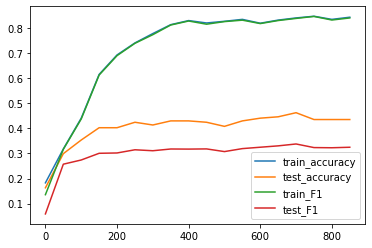

In [7]:
metrics_df.plot(y=["train_accuracy", "test_accuracy", "train_F1", "test_F1"])

In [ ]:
losses_df3, metrics_df3, _, _ = train_model(load_list=load_list, label_dict=label_dict, GCN_names=GCN_names, COMBINER=COMBINER,
        SEED=SEED, num_epoch=num_epoch, test_interval=test_interval, lr=lr, weight_decay=weight_decay, 
        dropout=dropout, adj_parameter=adj_parameter, VERBOSE=VERBOSE, doSMOTE = doSMOTE,
        RUN_TITLE=RUN_TITLE, RUN_TITLE_SHORT=RUN_TITLE_SHORT,
        OUTPUT_FILES=OUTPUT_FILES, MAKE_PLOTS=MAKE_PLOTS, feature_extract=feature_extract, num_gcn=3)